In [1]:
import pandas as pd
dataset = pd.read_csv("datasets_9768_13874_HR_comma_sep.csv")
dataset.shape

(14999, 10)

In [2]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
sample = dataset
sample.shape

(14999, 10)

In [4]:
sample = sample.rename(columns = {'sales':'department'})

In [5]:
import numpy as np
sample['department']=np.where(sample['department'] =='IT', 'technical', sample['department'])

In [6]:
sample.shape

(14999, 10)

In [7]:
sample = pd.get_dummies(sample,drop_first=True)
sample

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,1,0,1,0


In [8]:
sample_features = sample.columns.values.tolist()
y=['left']
X=[i for i in sample_features if i not in y]

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 600)
rfe = RFE(model, 10)
rfe = rfe.fit(sample[X], sample[y].values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\sibup\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True False False False False  True  True  True  True False  True False
  True  True False  True  True]
[1 5 6 8 4 1 1 1 1 7 1 3 1 1 2 1 1]


In [10]:
sample[X].columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [11]:
rfe.ranking_

array([1, 5, 6, 8, 4, 1, 1, 1, 1, 7, 1, 3, 1, 1, 2, 1, 1])

In [12]:
ranking = list(rfe.ranking_)

In [13]:
colmn = {
    'features' : sample[X].columns,
    'ranking': ranking
}
column_ranking = pd.DataFrame(colmn)

In [14]:
column_ranking

,features,ranking
0,satisfaction_level,1
1,last_evaluation,5
2,number_project,6
3,average_montly_hours,8
4,time_spend_company,4
5,Work_accident,1
6,promotion_last_5years,1
7,department_accounting,1
8,department_hr,1
9,department_management,7


In [15]:
cols = []
for i in range(0,17):
    if column_ranking.iloc[i]['ranking'] == 1:
        cols.append(column_ranking.iloc[i]['features'])

In [16]:
cols

['satisfaction_level',
 'Work_accident',
 'promotion_last_5years',
 'department_accounting',
 'department_hr',
 'department_marketing',
 'department_sales',
 'department_support',
 'salary_low',
 'salary_medium']

In [17]:
X=sample[cols]
y=sample['left']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.792


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.898


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3462
           1       0.82      0.72      0.77      1038

    accuracy                           0.90      4500
   macro avg       0.87      0.84      0.85      4500
weighted avg       0.90      0.90      0.90      4500



C:\Users\sibup\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 1.0, 'Random Forest')

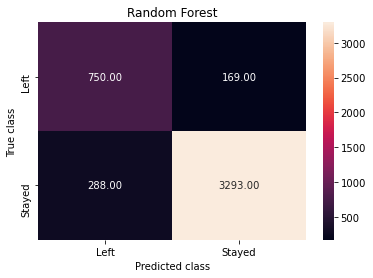

In [23]:
import matplotlib.pyplot as plt
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

In [24]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3462
           1       0.59      0.32      0.41      1038

    accuracy                           0.79      4500
   macro avg       0.71      0.63      0.64      4500
weighted avg       0.77      0.79      0.77      4500



C:\Users\sibup\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 1.0, 'Logistic Regression')

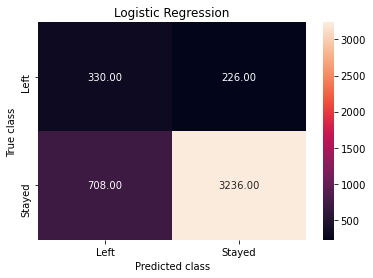

In [25]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

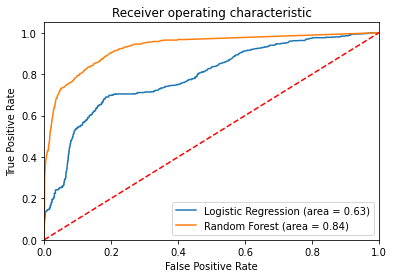

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [27]:
feature_labels = np.array(cols)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_marketing-0.38%
department_accounting-0.41%
promotion_last_5years-0.54%
department_hr-0.54%
department_support-0.64%
department_sales-0.70%
salary_medium-0.94%
salary_low-2.24%
Work_accident-2.95%
satisfaction_level-90.66%


In [28]:
X

,satisfaction_level,Work_accident,promotion_last_5years,department_accounting,department_hr,department_marketing,department_sales,department_support,salary_low,salary_medium
0,0.38,0,0,0,0,0,1,0,1,0
1,0.80,0,0,0,0,0,1,0,0,1
2,0.11,0,0,0,0,0,1,0,0,1
3,0.72,0,0,0,0,0,1,0,1,0
4,0.37,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0,0,0,0,0,0,1,1,0
14995,0.37,0,0,0,0,0,0,1,1,0
14996,0.37,0,0,0,0,0,0,1,1,0
14997,0.11,0,0,0,0,0,0,1,1,0


In [29]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [30]:
cols

['satisfaction_level',
 'Work_accident',
 'promotion_last_5years',
 'department_accounting',
 'department_hr',
 'department_marketing',
 'department_sales',
 'department_support',
 'salary_low',
 'salary_medium']

In [31]:
dataset['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [32]:
dataset['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [33]:
rf.predict(np.array([0.3, 1, 0, 0, 0, 0, 0, 0, 1, 0]).reshape(1, 10))

array([0], dtype=int64)

In [34]:
temp = dataset[['satisfaction_level', 'left']]

In [35]:
left_1 = list(temp.iloc[np.where(temp['left'] == 1)[0]]['satisfaction_level'])
left_0 = list(temp.iloc[np.where(temp['left'] == 0)[0]]['satisfaction_level'])

In [36]:
print(max(left_1), min(left_1))

0.92 0.09


In [37]:
print(max(left_0), min(left_0))

1.0 0.12


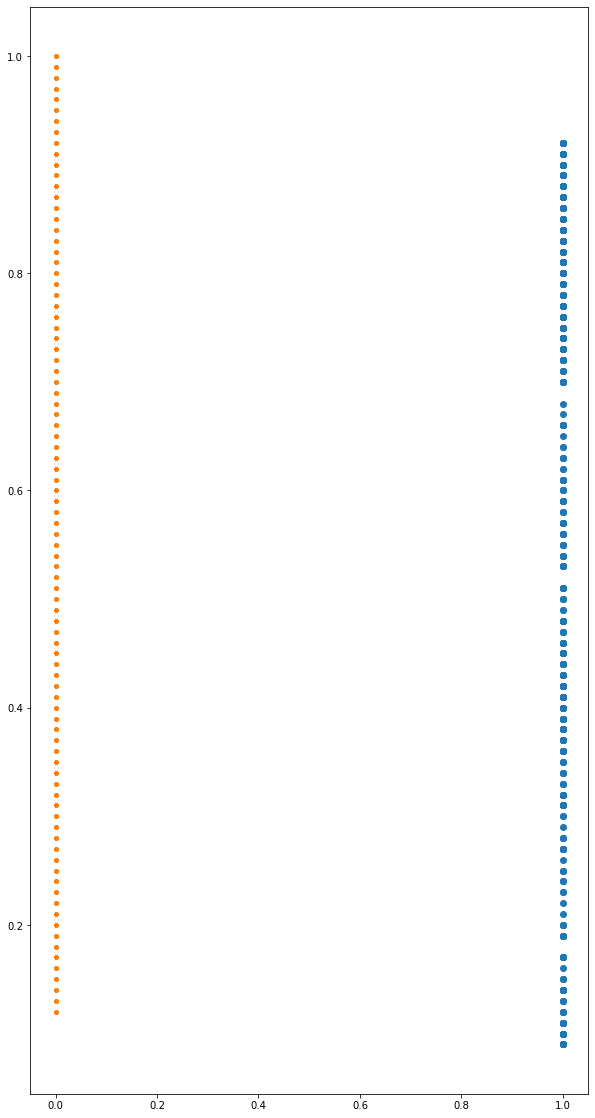

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20
plt.scatter(temp.iloc[np.where(temp['left'] == 1)[0]]['left'], temp.iloc[np.where(temp['left'] == 1)[0]]['satisfaction_level'], marker='o')
plt.scatter(temp.iloc[np.where(temp['left'] == 0)[0]]['left'], temp.iloc[np.where(temp['left'] == 0)[0]]['satisfaction_level'], marker='.')

In [39]:
import _pickle as cPickle
with open('model.pkl', 'wb') as f:
    cPickle.dump(rf, f)                                                                                        

In [40]:
with open('model.pkl', 'rb') as f:
    rf = cPickle.load(f)

rf.predict(np.array([0.3, 1, 0, 0, 0, 0, 0, 0, 1, 0]).reshape(1, 10))

array([0], dtype=int64)

In [41]:
import json
import _pickle as cPickle
import numpy as np

with open('model.pkl', 'rb') as f:
    rf = cPickle.load(f)

with open("info.json") as file:
    json_object = json.loads(file.read())

cols = ['satisfaction_level', 'Work_accident', 'promotion_last_5years', 'department_accounting', 'department_hr', 'department_marketing', 'department_sales', 'department_support', 'salary_low', 'salary_medium']
d = {i:0 for i in cols}
for i in json_object:
    if i in d:
        d[i] = float(json_object[i])
    else:
        x = str(i)+'_'+str(json_object[i])
        if x in d:
            d[x] = 1
            
val = rf.predict(np.array(list(d.values())).reshape(1, 10))[0]